In [1]:
# 샘플 HTML 불러오기
with open("./sample.html", encoding="utf-8")as f :
    html_str = f.read()

print(html_str)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sample HTML Page</title>
</head>
<body>
    <div id="header">
        <h1>Sample Homepage</h1>
        <ul class="nav">
            <li>home</li>
            <li>About</li>
            <li>Contact</li>
        </ul>
    </div>
    <div id="content">
        <h1>Content Title</h1>
        <p>Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus interdum.</p>
        <ul class="list">
            <li>Comment 1</li>
            <li>Comment 2</li>
            <li>Comment 3</li>
            <li>Comment 4</li>
        </ul>
    </div>
    <div id="footer">
        &copy; Bit Academy
    </div>
</body>
</html>


In [2]:
# BeautifulSoup으로 객체화
from bs4 import BeautifulSoup

# text html -> soup
soup = BeautifulSoup(html_str)

print(type(soup))
#DOM화 된 객체를 확인
print(soup.prettify())

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Sample HTML Page
  </title>
 </head>
 <body>
  <div id="header">
   <h1>
    Sample Homepage
   </h1>
   <ul class="nav">
    <li>
     home
    </li>
    <li>
     About
    </li>
    <li>
     Contact
    </li>
   </ul>
  </div>
  <div id="content">
   <h1>
    Content Title
   </h1>
   <p>
    Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus interdum.
   </p>
   <ul class="list">
    <li>
     Comment 1
    </li>
    <li>
     Comment 2
    </li>
    <li>
     Comment 3
    </li>
    <li>
     Comment 4
    </li>
   </ul>
  </div>
  <div id="footer">
   © Bit Academy
  </div>
 </body>
</html>


In [3]:
# 문서의 title 태그를 확인
title_tag = soup.title
print("제목 태그:", title_tag, type(title_tag))
print("태그명:", title_tag.name)
print("콘텐츠", title_tag.text)

제목 태그: <title>Sample HTML Page</title> <class 'bs4.element.Tag'>
태그명: title
콘텐츠 Sample HTML Page


In [4]:
# 최상위 태그(html) 태그 확인
html_tag = soup.html
print(html_tag.name)

# head, body는 html의 자식
children = html_tag.children # 특정 태그의 자식을 확인
print(type(children))

from bs4.element import Tag

# children 순회
for child in children :
    # NavigableString은 Tree 구조를 구축하기 위한 특수한 구분기호
    if isinstance(child, Tag): # 태그면 
        print(child.name, type(child)) # 태그의 이름을 출력

html
<class 'list_iterator'>
head <class 'bs4.element.Tag'>
body <class 'bs4.element.Tag'>


In [5]:
# body의 후손 확인
for node in soup.body.descendants:
    if isinstance(node, Tag): # node가 태그라면
        print("body has {} tag".format(node.name))
        
# 부모 노드의 확인
print(soup.body.parent == soup.html)

body has div tag
body has h1 tag
body has ul tag
body has li tag
body has li tag
body has li tag
body has div tag
body has h1 tag
body has p tag
body has ul tag
body has li tag
body has li tag
body has li tag
body has li tag
body has div tag
True


In [6]:
# find를 이용한 노드 탐색
# 문서 내, div 노드를 탐색
divs = soup.body.find("div")
print(divs)
divs = soup.body.findAll("div") # findAll -> 매칭되는 모든 ㅛ소
print(divs)
print("문서 내에 {}개의 div가 있습니다.".format(len(divs)))

<div id="header">
<h1>Sample Homepage</h1>
<ul class="nav">
<li>home</li>
<li>About</li>
<li>Contact</li>
</ul>
</div>
[<div id="header">
<h1>Sample Homepage</h1>
<ul class="nav">
<li>home</li>
<li>About</li>
<li>Contact</li>
</ul>
</div>, <div id="content">
<h1>Content Title</h1>
<p>Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus interdum.</p>
<ul class="list">
<li>Comment 1</li>
<li>Comment 2</li>
<li>Comment 3</li>
<li>Comment 4</li>
</ul>
</div>, <div id="footer">
        © Bit Academy
    </div>]
문서 내에 3개의 div가 있습니다.


In [7]:
# 문서 내의 class 속성이 list인 ul을 검색
list_ul = soup.body.find("ul", {"class": "list"})

for li in list_ul.children:
    if isinstance(li, Tag):
        print("list item:", li.text)

list item: Comment 1
list item: Comment 2
list item: Comment 3
list item: Comment 4


In [8]:
# CSS Selector를 이용하면 편리한 방싯으로 요소 검색 가능
# id 셀렉터 : #id
# class 셀렉터 : .class
# 자식 셀렉터 : >
# 자손 셀렉터 : 공백
list_li = soup.body.select("ul.list > li")
# class가 list인 ul의 자식인 li
print(list_li)

[<li>Comment 1</li>, <li>Comment 2</li>, <li>Comment 3</li>, <li>Comment 4</li>]


In [9]:
# daum 뉴스 수집
from urllib.request import urlopen

url = "https://news.daum.net/"
#html 받아오기
req = urlopen(url)
print(req.getcode())

if req.getcode() == 200: # 성공
    html = req.read().decode("utf-8")
    print(html)
else: # 실패
    print("HTTP-Error")


200

<!DOCTYPE html>



<html lang="ko" class="os_unknown none unknown version_0 ">
<head>
<meta charset="utf-8">
<meta name="referrer" content="always" />

<meta property="og:author" content="Daum 뉴스" />
<meta property="og:site_name" content="다음뉴스" />
<meta property="og:title" content="홈"/>
<meta property="og:image" content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" />
<meta property="og:description" content="다음뉴스" />
<meta property="og:url" content="https://news.daum.net/" />
<link rel="shortcut icon" href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico">

<title>홈 | 다음뉴스</title>

<meta http-equiv="X-UA-Compatible" content="IE=edge">

<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/bf8c032/style.css.merged.css" />
<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/bf8c032/calendar.css.merged.css" />

<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc/original/U0301/cssjs/JSON-js/fc535e9c

In [10]:
# html -> DOM 객체화
# soup
soup = BeautifulSoup(html)
# print(soup.prettify())

# 문서의 제목
print("문서의 제목:", soup.title.text)
# ul.newsissue > li

issues = soup.select("ul.list_newsissue > li")
print(len(issues))

news = []

for issue in issues:
#    print(issue)
    # li 태그 자손 태그 a.link_txt
    link = issue.select("a.link_txt")[0]
#    print(link)
    news_title = link.text.strip() # strip은 앞 공백 지우기
    news_link = link["href"]
    
    # dict를 만들어서 추가
    news.append({
        "title": news_title,
        "link": news_link
    })

문서의 제목: 홈 | 다음뉴스
20


In [11]:
print("다음 뉴스 주요기사")

for index, item in enumerate(news):
    print("{}: {} - {}".format(index + 1, item.get("title"), item.get("link")))

다음 뉴스 주요기사
1: 김재원 "안철수 단일화 제안은 요행수" - https://v.daum.net/v/20220215085622146
2: 서울 학생확진자 3%까진 정상등교..38일까지 가정학습 허용 - https://v.daum.net/v/20220215093022325
3: 작년 1조원 이상 배당 기업 7곳..개인배당 1위는 2천577억원 이재용 - https://v.daum.net/v/20220215055508486
4: 당신의 '6촌' 다 아시나요?.."시대가 달라졌다" 총수 특수관계인 손본다 - https://v.daum.net/v/20220215093001291
5: 심혈관 질환 예방에 도움되는 비타민K .. 김·파래 등 해조류에 풍부 - https://v.daum.net/v/20220215092839254
6: 김재원 "단일화 여론조사는 없다..安, 점수조작 요행수 기대" - https://v.daum.net/v/20220215091812896
7: 美 바이든·英 존슨 "우크라 사태, 외교적 기회의 창 남아있어" - https://v.daum.net/v/20220215092620177
8: 아보카도에 뻗친 '검은 손'..美, 멕시코 갱단 협박에 "수입중단" - https://v.daum.net/v/20220215063019929
9: 尹, 현충원 참배.."위대한 국민과 자랑스러운 나라 만들겠다" - https://v.daum.net/v/20220215092602165
10: '분양 물량 20%' 재건축·재개발 아파트가 청약 열기 이끌었다 - https://v.daum.net/v/20220215092426116
11: "5~6m 운전했어도 음주운전시 면허취소 정당" - https://v.daum.net/v/20220215092424113
12: 검찰총장실에서 깜짝 놀라 눈가리고.. 연기까지 도전한 추미애 - https://v.daum.net/v/20220215072611556
13: 美 국방부 "한국이 우크라 지원 원하면 우크라인 환영할 것" -

In [12]:
# 네이버 날씨 뉴스 실습

url = "https://weather.naver.com/news"

req = urlopen(url)
# print(req.getcode())
if req.getcode() == 200:
    html = req.read().decode("utf-8")
else:
    print()
    
soup = BeautifulSoup(html)
print(soup.title.text)

subjs = soup.select(".wn_list_wrap> li")
# print(len(subjs))

weather = []

for subj in subjs:
#    print(subj) # stron.tit_news 가져오기?
    links = subj.select("strong.tit_news")[0]
#    print(links)
    
    weather_title = links.text.strip()
    
    weather.append({
        "titles" : weather_title
    })
    
for index, item in enumerate(weather):
    print("{}: {}".format(index+1, item.get("titles")))
    
    






네이버 날씨
1: 낮기온도 영하권…시베리아 영하 40도 찬 공기 영향
2: 늦은 정월 대보름에도 강추위…일부 지역 눈·비 소식
3: [굿모닝 날씨] 정월대보름 찬바람에 기온 ‘뚝’
4: 돌아온 강추위
5: '추워요'
6: 눈 내리는 출근길
7: 눈 내리는 오전
8: '어이쿠'
9: '눈이 오네'
10: '귀가 시리네'
11: '춥다 추워'
12: 꽁꽁 언 정월대보름…시베리아서 내려온 찬 공기 영향
13: 오늘(화) 출근길 영하권 강추위…중부 일부, 전라서해안 약한 눈발
14: 北 길주군서 이틀 연속 지진… 기상청 "자연 지진"
15: [내일날씨] 다시 찾아온 동장군…충청·전라·제주엔 눈
16: [날씨] 출근길, 중부 곳곳에 눈...대보름 강추위 왔다
17: [내일날씨] 서울 아침 -10도, 전국 한파 …전라·제주 최대 눈 7~10㎝
18: [날씨] 정월대보름 영하권 추위…밤부터 충청·호남·제주 눈
19: [날씨] 광주·전남 보름달 대신 곳곳 눈…최대 7cm
20: [날씨] 다시 매서운 추위…주말부터 평년 기온 회복
21: 출근길 영하권 날씨
22: 강추위 불어닥친 출근길
23: 北 함경북도 길주 규모 2.5 지진… 기상청 “자연 발생”
24: 정월대보름 아침 기온 뚝 "빙판길 조심하세요"
25: [날씨] 경남 다시 차가워진 공기…당분간 추위 지속
26: [날씨] ‘정월대보름’ 부산 점차 추워져…부·울·경 ‘돌풍 주의’
27: [날씨] 전북 곳곳 산발적 눈…강한 바람 체감온도↓
28: '강추위' 광주·전남 17일까지 최고 7㎝ 눈 예보
29: [출근길 날씨] 정월대보름, 아침 기온 ‘뚝’…산불 주의
30: [날씨] 강원 오늘 추워요…바람으로 체감 온도 ↓


In [13]:
# 네이버 최신 영화
url = "https://movie.naver.com/movie/running/current.naver"

req = urlopen(url)
print(req.getcode())

if req.getcode() == 200:
    html = req.read().decode("utf-8")
    print(html)

200









	
	
	
	
	
	

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta http-equiv="imagetoolbar" content="no">
<title>현재 상영영화 : 네이버 영화</title>

	
	
	
	
	
		
		
	



<meta property="me2:image" content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg"/>
<meta property="me2:post_tag" content="네이버영화 현재상영작"/>
<meta property="me2:category1" content="네이버영화"/>
<meta property="me2:category2" content="현재상영작"/>



	
		<meta property="og:title" content="현재상영작 : 네이버 영화" />
	
	
	


<meta property="og:type" content="article"/>

<meta property="og:url" content="https://movie.naver.com/movie/running/current.naver"/>


	
	
		<meta property="og:image" content="https://ssl.pstatic.net/static/m/movie/icons/OG_270_270.png"/>
	


	
	<meta property="og:description" content="상영 중 영화의 예매율/평점/좋아요 순 정보 제공."/>



<meta property="og:article:thumbnailUrl" content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_pr

In [14]:
soup = BeautifulSoup(html)
print(soup.title.text)

movies = []

# ul.lst_detail_t1 의 > li
current_movies = soup.select("ul.lst_detail_t1 > li")
# print(current_movies[0].prettify())
for movie in current_movies:
    link = movie.select("div.thumb > a")[0]
    img = link.select("img")[0]
    title = img["alt"]
    # print(link["href"], title)
    movies.append({
        "title": title,
        "link": "https://movie.naver.com/" + link["href"]
    })

현재 상영영화 : 네이버 영화


In [15]:
for index, movie in enumerate (movies):
    print("{}위 : {} - {}".format(index+1, movie["title"], movie["link"]))

1위 : 나일 강의 죽음 - https://movie.naver.com//movie/bi/mi/basic.naver?code=191547
2위 : 나의 촛불 - https://movie.naver.com//movie/bi/mi/basic.naver?code=191652
3위 : 해적: 도깨비 깃발 - https://movie.naver.com//movie/bi/mi/basic.naver?code=194204
4위 : 킹메이커 - https://movie.naver.com//movie/bi/mi/basic.naver?code=177366
5위 : 355 - https://movie.naver.com//movie/bi/mi/basic.naver?code=193794
6위 : 극장판 안녕 자두야: 제주도의 비밀 - https://movie.naver.com//movie/bi/mi/basic.naver?code=208821
7위 : 스파이더맨: 노 웨이 홈 - https://movie.naver.com//movie/bi/mi/basic.naver?code=208077
8위 : 씽2게더 - https://movie.naver.com//movie/bi/mi/basic.naver?code=187320
9위 : 미싱타는 여자들 - https://movie.naver.com//movie/bi/mi/basic.naver?code=198967
10위 : 굿 보스 - https://movie.naver.com//movie/bi/mi/basic.naver?code=207480
11위 : 만년이 지나도 변하지 않는 게 있어 - https://movie.naver.com//movie/bi/mi/basic.naver?code=206024
12위 : 어나더 라운드 - https://movie.naver.com//movie/bi/mi/basic.naver?code=194813
13위 : 가슴이 떨리는 건 너 때문 - https://movie.naver.com//movie/bi/mi/basic

In [16]:
# 포스터 다운로드
# print(current_movies[0].prettify())
# 포스터 디렉토리가 없으면 새로 만들기
import os, re
from urllib.request import urlretrieve
if not os.path.exists("./poster"): # 포스터 디렉토리가없다면
    os.makedirs("./poster")
    
for movie in current_movies:
#    print(movie)
    img = movie.select("img")[0]
#     print(img)
    title = re.sub(r"[\/:*?<>|.]", "-", img["alt"].strip())
    # 파일명에 사용할 수 없는 문자는 제거
    
    img_filename = title +".jpg" # 저장할 이미지 파일 명
    
    #특정 url의 파일 다운로드 -> urlretrieve
    urlretrieve(img["src"], "./poster/"+img_filename)
    
    print(".", end="")
    
print()

..................................................


C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/479949847.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/479949847.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  input_search = driver.find_element_by_xpath('//*[@id="query"]')
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/479949847.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bin_search = driver.find_element_by_css_selector("#search_btn")


<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/98.0.4758.102 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="iphone 13 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'iphone 13'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'iphone 13'의 네이버 통합검색 결과입니다."> <title>iphone 13 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><
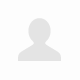
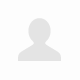
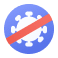
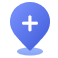
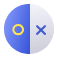
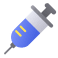
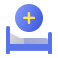

In [17]:
# Selenium을 이용한 정보 수집, 크롬 드라이버 설치필요함
from selenium import webdriver

# 크롬 브라우저 실행
driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")

# 네이버에 접속
driver.get("http://www.naver.com")

# 잠시 대기
driver.implicitly_wait(3)

# 페이지 소스 출력
# print(driver.page_source)
# 검색창의 XPath: //*[@id="query"]

# 검색어 창 찾기
input_search = driver.find_element_by_xpath('//*[@id="query"]')
# 검색어 입력
input_search.send_keys("iphone 13")
# 검색 버튼 selector: #search_btn
bin_search = driver.find_element_by_css_selector("#search_btn")
bin_search.click()

driver.implicitly_wait(3)
print(driver.page_source)

In [18]:
# 크롬 브라우저 띄우고
# naver.com 접속
# 아이디 입력
# 비밀번호 입력
# 로그인 버튼 클릭

driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
driver.get("http://www.naver.com")
driver.implicitly_wait(3)
# 로그인 버튼 Xpath //*[@id="account"]/a
login_btn = driver.find_element_by_xpath('//*[@id="account"]/a')
login_btn.click()
driver.implicitly_wait(3)

# 아이디 필드 CSS 셀렉터 : #id
# 비밀번호 필드 CSS 셀렉터 : #pw
# 로그인 버튼 CSS 셀렉터 : #log\.login
input_id = driver.find_element_by_css_selector("#id")
input_id.send_keys("litmuscube")
input_pw = driver.find_element_by_css_selector("#pw")
input_pw.send_keys("asdfasdf")

# submit 버튼 선택
submit_btn = driver.find_element_by_css_selector("#log\.login")
#submit_btn.click()

C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/1643363086.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/1643363086.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  login_btn = driver.find_element_by_xpath('//*[@id="account"]/a')
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/1643363086.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  input_id = driver.find_element_by_css_selector("#id")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/1643363086.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  input_pw = driver.find_element_by_css_selector("#pw")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/1643363086.py:24: DeprecationWarning: find_element_by_* comm

In [19]:
driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
driver.get("http://www.naver.com")
driver.implicitly_wait(3)
input_search = driver.find_element_by_css_selector("#query")
input_search.send_keys("유튜브")
bin_search = driver.find_element_by_css_selector("#search_btn")
bin_search.click()

driver.implicitly_wait(3) # 대기

bin_search = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nsite._project_site_channel_root._section_nsite_._sp_ntotal._prs_vsd_bas > div > div > div.nsite_tit > div > div.nsite_name > a")
bin_search.click()

driver.implicitly_wait(3) # 대기

# print(driver.page_source)
input_search = driver.find_element_by_xpath('//input[@id="search"]')
input_search.send_keys("방탄소년단 다이너마이트")


C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/3261775135.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/3261775135.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  input_search = driver.find_element_by_css_selector("#query")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/3261775135.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bin_search = driver.find_element_by_css_selector("#search_btn")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/3261775135.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bin_search = driver.find_element_by_css_selector("#main_pack > section.sc_new.sp_nsite._project_site_channel_root._section_nsite_._sp_ntotal._prs_vsd_bas > di

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//input[@id="search"]"}
  (Session info: chrome=98.0.4758.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x01127AC3+2587331]
	Ordinal0 [0x010BADD1+2141649]
	Ordinal0 [0x00FB3BB8+1063864]
	Ordinal0 [0x00FE01CE+1245646]
	Ordinal0 [0x00FE03CB+1246155]
	Ordinal0 [0x0100A612+1418770]
	Ordinal0 [0x00FF86D4+1345236]
	Ordinal0 [0x01008A0A+1411594]
	Ordinal0 [0x00FF84A6+1344678]
	Ordinal0 [0x00FD53F6+1201142]
	Ordinal0 [0x00FD62E6+1204966]
	GetHandleVerifier [0x012CDF22+1680738]
	GetHandleVerifier [0x01380DBC+2413564]
	GetHandleVerifier [0x011BD151+563089]
	GetHandleVerifier [0x011BBF13+558419]
	Ordinal0 [0x010C081E+2164766]
	Ordinal0 [0x010C5508+2184456]
	Ordinal0 [0x010C5650+2184784]
	Ordinal0 [0x010CF5BC+2225596]
	BaseThreadInitThunk [0x7761FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77A87A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77A87A6E+238]


In [20]:
driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
driver.get("https://www.youtube.com/")
input_search = driver.find_element_by_xpath('//input[@id="search"]')
input_search.send_keys("방탄소년단 다이너마이트")
bin_search = driver.find_element_by_xpath('//*[@id="search-icon-legacy"]/yt-icon')
bin_search.click()

driver.implicitly_wait(3)

bin_search = driver.find_element_by_xpath('//*[@id="video-title"]/yt-formatted-string')
bin_search.click()

C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/2462694380.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("E:/chromedriver_win32/chromedriver.exe")
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/2462694380.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  input_search = driver.find_element_by_xpath('//input[@id="search"]')
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/2462694380.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bin_search = driver.find_element_by_xpath('//*[@id="search-icon-legacy"]/yt-icon')
C:\Users\BIT\AppData\Local\Temp/ipykernel_11408/2462694380.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  bin_search = driver.find_element_by_xpath('//*[@id="video-title"]/yt-formatted-string')
